# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [671]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

def imshow(img,title='',col='g'):
    print(title)
    plt.axis("off")
    if(col == 'c'):
        plt.imshow(img)
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)
    plt.show()
    
training_file = "/home/ckyrkou/sdce/Deep_Learning/P2/CarND-Traffic-Sign-Classifier-Project/train.p" 
testing_file = "/home/ckyrkou/sdce/Deep_Learning/P2/CarND-Traffic-Sign-Classifier-Project/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
# Number of training examples and shape
#print(np.shape(X_train))
# Number of training labels and shape
#print(np.shape(y_train))
# Find unique values in the training label which indicates the number of classes
#print(len(set(y_train)))

X_test, y_test = test['features'], test['labels']
# Number of test samples and shape
#print(np.shape(X_test))
# Number of test labels and shape
#print(np.shape(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [396]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Image samples per class - Left: Class average image Right: A single sample from the class


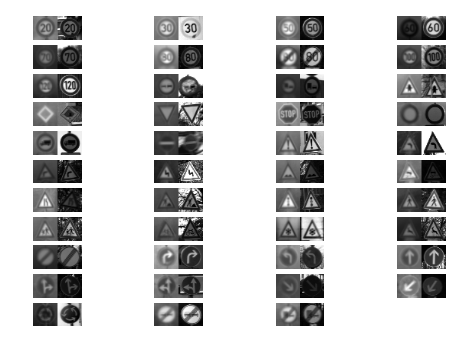

Number of Samples in each class


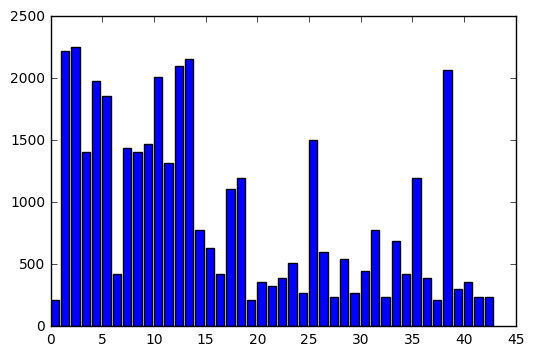

In [718]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline



def showAveragePerClass(X_train,y_train,n_classes):
    n_samples_per_class = np.zeros(n_classes)
    repr_class_im = np.zeros((43,32,32))
                             
    for i in range(0,n_classes):
        avg_im = np.zeros((32,32))
        im = np.zeros(image_shape)
        for j in range(0,n_train):
            if(y_train[j] == i):
                n_samples_per_class[i] = n_samples_per_class[i] + 1
                im = np.mean(X_train[j].squeeze(),axis=2)
                avg_im = avg_im + im
        #plt.figure(figsize=(1,1))
        avg=(avg_im/n_samples_per_class[i])
        repr_class_im[i]=avg
        disp_im = np.concatenate([avg,im],axis=1)
        plt.subplot(11,4,i+1)
        plt.axis("off")
        plt.imshow(disp_im,cmap='gray')
    print("Image samples per class - Left: Class average image Right: A single sample from the class")
    plt.show()
    print('Number of Samples in each class')
    plt.bar(range(43),n_samples_per_class)
    return n_samples_per_class,repr_class_im


n_samples_per_class,repr_class_im = showAveragePerClass(X_train,y_train,n_classes)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Mean Training Set Image:


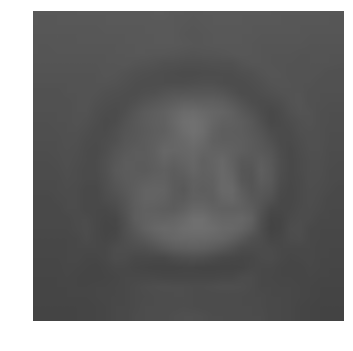

In [727]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import cv2

#Make the training images grayscale
X_train_gray = np.zeros(np.shape(X_train)[0:3])
for j in range(0,n_train):
    X_train_gray[j] = np.mean(X_train[j].squeeze(),axis=2)
    #imshow(X_train_gray[j])

gray_shape = np.concatenate([np.shape(X_train)[0:3],[1]],axis=0)
X_train_gray = np.reshape(X_train_gray,gray_shape)   
#print(np.shape(X_train_gray))

#Make the testing images grayscale
X_test_gray = np.zeros(np.shape(X_test)[0:3])
for j in range(0,n_test):
    X_test_gray[j] = np.mean(X_test[j].squeeze(),axis=2)

gray_shape = np.concatenate([np.shape(X_test)[0:3],[1]],axis=0)
X_test_gray = np.reshape(X_test_gray,gray_shape)

#Subtract the Mean Value from the Training Data and Test Data
#Get the mean only from the training data and not the test data.
X_train_mean = np.mean(X_train_gray,axis=0)

#print(np.shape(np.max(X_train_gray.squeeze(),axis=0)))
imshow(X_train_mean.squeeze(),col='g',title='Mean Training Set Image:')

X_train_gray[1:n_train] = ((X_train_gray[1:n_train]))

#print(np.shape(X_train_gray))
X_test_gray[1:n_test] = ((X_test_gray[1:n_test])) 


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**

The main preprocessing technique I used was to grayscale the images. I used this approach since many signs had similart color patterns and hence, no real advantage would come from using color expect from some cases. Furthermore, the grayscale approach was found to produce better results as shown in [1]. In addition, in my experiments I also tried to shift the data to zero mean by subtracting the mean of the training set from all the data per each dimension. Even though in theory this approach is suggested I found that it performed worse by 3-4% in terms of testing accuracy. Hence, I proceeded with just the grayscale conversion as a preprocessing technique. I didn't use any data augmentation and ended up with a testing accuracy of 95%. Enhancing the dataset can for sure lead to better results as also shown in [1].

[1] P. Semanet, Y. LeCun, "Traffic Sign Recognition with Multi-Scale Convolutional Networks"


In [730]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
#print(n_samples_per_class)
#print(np.sum(n_samples_per_class))
#print(np.shape(X_train))

val_per = 0.2 #percentage of validation set of the total training samples
# Note: to provide a fair validation samples for the validation set are taken for all classes as a 
# percentage the total samples in the class

n_val_per_data = np.floor(n_samples_per_class*val_per)
count_val = np.zeros(np.shape(n_val_per_data))
X_validate_data = np.zeros(np.concatenate([[int(np.sum(n_val_per_data))],np.shape(X_train)[1:3],[1]],axis=0))
X_train_data = np.zeros(np.concatenate([[int(np.sum(n_samples_per_class) - np.sum(n_val_per_data))],np.shape(X_train)[1:3],[1]],axis=0))
#print(np.shape(X_train_data))
#print(np.shape(X_validate_data))
y_validate_data = np.zeros(np.shape(X_validate_data)[0])
y_train_data = np.zeros(np.shape(X_train_data)[0])
count_train = 0

for j in range(0,n_train):
    indx=int(y_train[j])
    if(count_val[indx] < n_val_per_data[indx]):
        X_validate_data[int(np.sum(count_val))] = X_train_gray[j]
        y_validate_data[int(np.sum(count_val))] = y_train[j]
        count_val[indx] = count_val[indx] + 1
    else:
        X_train_data[count_train] = X_train_gray[j]
        y_train_data[count_train] = y_train[j]
        count_train = count_train + 1
        
#print(np.shape(X_train_data)[0])
#print(np.shape(X_validate_data)[0])
#print(np.shape(X_validate_data)[0]+np.shape(X_train_data)[0])
#print(np.shape(X_train)[0])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

To begin with I used 30% of my training data for validation. Then I tried using 20% for validation in order to increase the size of the training data. In order to generate the validation set I did not randomly select 20% from all the training data but rather selected 20% of the data of each class in order to make the validation set more representative and test for all cases.  

In [543]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x,lf1 = 8,lf2 = 16):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #print(x)
    
    #print('ConvNet Architecture:')

    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    #x = tf.reshape(x, (-1, 28, 28, 1))
    # Pad 0s to 32x32. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    #x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")   
    #print(x)
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W_C1=tf.Variable(tf.truncated_normal((5,5,1,lf1),mu,sigma))
    B_C1=tf.Variable(tf.zeros(lf1,1))
    C1=tf.nn.conv2d(x,W_C1,[1,1,1,1],'VALID')+B_C1
    #print(C1)
    # TODO: Activation.
    AC1=tf.nn.relu(C1)
    #print(AC1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    P1=tf.nn.max_pool(AC1,[1,2,2,1],[1,2,2,1],'VALID')
    #print(P1)
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W_C2=tf.Variable(tf.truncated_normal((5,5,lf1,lf2),mu,sigma))
    B_C2=tf.Variable(tf.zeros(lf2,1))
    C2=tf.nn.conv2d(P1,W_C2,[1,1,1,1],'VALID')+B_C2
    #print(C2)
    # TODO: Activation.
    AC2=tf.nn.relu(C2)
    #print(AC2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    P2=tf.nn.max_pool(AC2,[1,2,2,1],[1,2,2,1],'VALID')
    #print(P2)
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    FL = tf.contrib.layers.flatten(P2,[1,5*5*lf2])
    #print(FL)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    #FC1 = tf.contrib.layers.fully_connected(FL,[400,120])
    W_FC1=tf.Variable(tf.truncated_normal((5*5*lf2,120),mu,sigma))
    B_FC1=tf.Variable(tf.zeros(120,1))
    FC1 = (tf.matmul(FL,W_FC1)+B_FC1)
    #print(FC1)
    # TODO: Activation.
    AC3=tf.nn.relu(FC1)
    #print(AC3)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W_FC2=tf.Variable(tf.truncated_normal((120,84),mu,sigma))
    B_FC2=tf.Variable(tf.zeros(84,1))
    FC2 = (tf.matmul(AC3,W_FC2)+B_FC2)
    #print(FC2)
    # TODO: Activation.
    AC4=tf.nn.relu(FC2)
    #print(AC4)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W_FC3=tf.Variable(tf.truncated_normal((84,43),mu,sigma))
    B_FC3=tf.Variable(tf.zeros(43,1))
    FC3 = (tf.matmul(AC4,W_FC3)+B_FC3)
    #print(FC3)
    logits=FC3
    return logits

def signRecNet(x,lf1 = 8,lf2 = 16,lf3 = 32, lf4 = 32):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #print(x)
    
    #print('ConvNet Architecture:')

    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    #x = tf.reshape(x, (-1, 28, 28, 1))
    # Pad 0s to 32x32. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    #x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")   
    #print(x)
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W_C1=tf.Variable(tf.truncated_normal((5,5,1,lf1),mu,sigma))
    B_C1=tf.Variable(tf.zeros(lf1,1))
    C1=tf.nn.conv2d(x,W_C1,[1,1,1,1],'VALID')+B_C1
    AC1=tf.nn.relu(C1)
    # Input = 28x28x6. Output = 24x24x6.
    W_C2=tf.Variable(tf.truncated_normal((5,5,lf1,lf2),mu,sigma))
    B_C2=tf.Variable(tf.zeros(lf2,1))
    C2=tf.nn.conv2d(AC1,W_C2,[1,1,1,1],'VALID')+B_C2
    AC2=tf.nn.relu(C2)
    
    # Input = 24x24xN. Output = 12x12xN
    P1=tf.nn.max_pool(AC2,[1,2,2,1],[1,2,2,1],'VALID')
    
    DROP1=tf.nn.dropout(P1,keep_prob = 0.8)
    
    # Input = 12x12xN. Output = 10x10xN.
    W_C3=tf.Variable(tf.truncated_normal((3,3,lf2,lf3),mu,sigma))
    B_C3=tf.Variable(tf.zeros(lf3,1))
    C3=tf.nn.conv2d(DROP1,W_C3,[1,1,1,1],'VALID')+B_C3
    AC3=tf.nn.relu(C3)
    # Input = 10x10x6. Output = 8x8x6.
    W_C4=tf.Variable(tf.truncated_normal((3,3,lf3,lf4),mu,sigma))
    B_C4=tf.Variable(tf.zeros(lf4,1))
    C4=tf.nn.conv2d(AC3,W_C4,[1,1,1,1],'VALID')+B_C4
    AC4=tf.nn.relu(C4)
    
    #Input = 8x8xN. Output = 4x4xN
    P2=tf.nn.max_pool(AC4,[1,2,2,1],[1,2,2,1],'VALID')

    # TODO: Flatten. Input = 4x4x16. Output = 400.
    FL = tf.contrib.layers.flatten(P2,[1,4*4*lf4])
    #print(FL)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    #FC1 = tf.contrib.layers.fully_connected(FL,[400,120])
    #DROP1=tf.nn.dropout(FL,0.5)
    
    #DROP2=tf.nn.dropout(FL,keep_prob = 0.6)
    
    W_FC1=tf.Variable(tf.truncated_normal((4*4*lf4,120),mu,sigma))
    B_FC1=tf.Variable(tf.zeros(120,1))
    FC1 = (tf.matmul(FL,W_FC1)+B_FC1)
    #print(FC1)
    # TODO: Activation.
    AC4=tf.nn.relu(FC1)
    #print(AC4)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    DROP3=tf.nn.dropout(AC4,keep_prob = 0.5)
    
    W_FC2=tf.Variable(tf.truncated_normal((120,84),mu,sigma))
    B_FC2=tf.Variable(tf.zeros(84,1))
    FC2 = (tf.matmul(DROP3,W_FC2)+B_FC2)
    #print(FC2)
    # TODO: Activation.
    AC5=tf.nn.relu(FC2)
    #print(AC5)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W_FC3=tf.Variable(tf.truncated_normal((84,43),mu,sigma))
    B_FC3=tf.Variable(tf.zeros(43,1))
    FC3 = (tf.matmul(AC5,W_FC3)+B_FC3)
    #print(FC3)
    logits=FC3
    return logits

def signRecNet_deeper(x,lf1 = 8,lf2 = 16,lf3 = 32, lf4 = 32):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #print(x)
    
    #print('ConvNet Architecture:')

    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    #x = tf.reshape(x, (-1, 28, 28, 1))
    # Pad 0s to 32x32. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    #x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")   
    #print(x)
    
    # TODO: Layer 1: Convolutional. Input = 32x32. Output = 30x30.
    W_C1=tf.Variable(tf.truncated_normal((3,3,1,lf1),mu,sigma))
    B_C1=tf.Variable(tf.zeros(lf1,1))
    C1=tf.nn.conv2d(x,W_C1,[1,1,1,1],'VALID')+B_C1
    AC1=tf.nn.relu(C1)
    # Input = 30x30. Output = 28x28.
    W_C2=tf.Variable(tf.truncated_normal((3,3,lf1,lf2),mu,sigma))
    B_C2=tf.Variable(tf.zeros(lf2,1))
    C2=tf.nn.conv2d(AC1,W_C2,[1,1,1,1],'VALID')+B_C2
    AC2=tf.nn.relu(C2)
    
    # Input = 28x28. Output = 14x14xN
    P1=tf.nn.max_pool(AC2,[1,2,2,1],[1,2,2,1],'VALID')
    
    DROP1=tf.nn.dropout(P1,keep_prob = 0.8)
    
    # Input = 14x14xN. Output = 12x12xN.
    W_C3=tf.Variable(tf.truncated_normal((3,3,lf2,lf3),mu,sigma))
    B_C3=tf.Variable(tf.zeros(lf3,1))
    C3=tf.nn.conv2d(DROP1,W_C3,[1,1,1,1],'VALID')+B_C3
    AC3=tf.nn.relu(C3)
    # Input = 12x12 Output = 10x10
    W_C4=tf.Variable(tf.truncated_normal((3,3,lf3,lf4),mu,sigma))
    B_C4=tf.Variable(tf.zeros(lf4,1))
    C4=tf.nn.conv2d(AC3,W_C4,[1,1,1,1],'VALID')+B_C4
    AC4=tf.nn.relu(C4)
    
    #Input = 10x10xN. Output = 5x5xN
    P2=tf.nn.max_pool(AC4,[1,2,2,1],[1,2,2,1],'VALID')
    #print(P2)
    # Input = 5x5. Output = 3x3
    W_C5=tf.Variable(tf.truncated_normal((3,3,lf4,lf4),mu,sigma))
    B_C5=tf.Variable(tf.zeros(lf4,1))
    C5=tf.nn.conv2d(P2,W_C5,[1,1,1,1],'VALID')+B_C5
    #print(C5)
    AC5=tf.nn.relu(C5)
    #print(C5)
    # TODO: Flatten. Input = 4x4x16. Output = 400.
    FL = tf.contrib.layers.flatten(AC5,[1,3*3*lf4])
    #print(FL)
    #print(FL)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    #FC1 = tf.contrib.layers.fully_connected(FL,[400,120])
    #DROP1=tf.nn.dropout(FL,0.5)
    
    #DROP2=tf.nn.dropout(FL,keep_prob = 0.6)
    
    W_FC1=tf.Variable(tf.truncated_normal((3*3*lf4,120),mu,sigma))
    B_FC1=tf.Variable(tf.zeros(120,1))
    FC1 = (tf.matmul(FL,W_FC1)+B_FC1)
    #print(FC1)
    #print(FC1)
    # TODO: Activation.
    AC4=tf.nn.relu(FC1)
    #print(AC4)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    DROP3=tf.nn.dropout(AC4,keep_prob = 0.5)
    
    W_FC2=tf.Variable(tf.truncated_normal((120,84),mu,sigma))
    B_FC2=tf.Variable(tf.zeros(84,1))
    FC2 = (tf.matmul(DROP3,W_FC2)+B_FC2)
    #print(FC2)
    # TODO: Activation.
    AC5=tf.nn.relu(FC2)
    #print(AC5)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W_FC3=tf.Variable(tf.truncated_normal((84,43),mu,sigma))
    B_FC3=tf.Variable(tf.zeros(43,1))
    FC3 = (tf.matmul(AC5,W_FC3)+B_FC3)
    #print(FC3)
    logits=FC3
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I have tested three different architectures, the LeNet (lenet function) from the lab and two deeper ones (functions signRecNet and signRecNet_deeper). The first has 4 convolutional layers, two at each side of a pooling layer (2 with 5x5 filters and 2 with 3x3 filters). The second architecture which I ended up using has 5 convolutional layers all of filter of size 3x3 with two pooling layers to achieve a more graceful degradation of the input image and collect features at more hierachies. All architecture had the same number of neurons for the fully conencted layers.

The final architecture I used is as follows:

![signRecNet Architecture](ConvNetArchitecture.png)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


In [544]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Declare all necessary variables for convNet

EPOCHS = 100
BATCH_SIZE = 256

rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#logits = LeNet(x,6,16)
#logits = signRecNet(x)
logits = signRecNet_deeper(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Evaluate Model Using Test Data
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
print('Intialization Done')

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model

import tensorflow as tf

from sklearn.utils import shuffle

num_of_filters = np.array((8,16))

with tf.Session() as sess:         
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_data)

    print('Training')
    print()
    
    for i in range(EPOCHS):
        X_train_data, y_train_data = shuffle(X_train_data, y_train_data)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_validate_data, y_validate_data)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, 'trafficNet')
    print("Model saved")

    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Tensor("MaxPool_137:0", shape=(?, 5, 5, 32), dtype=float32)
Tensor("add_452:0", shape=(?, 3, 3, 32), dtype=float32)
Tensor("add_452:0", shape=(?, 3, 3, 32), dtype=float32)
Tensor("Flatten_72/Reshape:0", shape=(?, 288), dtype=float32)
Tensor("add_453:0", shape=(?, 120), dtype=float32)
Tensor("Relu_399:0", shape=(?, 120), dtype=float32)
Tensor("add_454:0", shape=(?, 84), dtype=float32)
Intialization Done
Training

EPOCH 1 ...
Validation Accuracy = 0.295

EPOCH 2 ...
Validation Accuracy = 0.603

EPOCH 3 ...
Validation Accuracy = 0.728

EPOCH 4 ...
Validation Accuracy = 0.785

EPOCH 5 ...
Validation Accuracy = 0.813

EPOCH 6 ...
Validation Accuracy = 0.838

EPOCH 7 ...
Validation Accuracy = 0.857

EPOCH 8 ...
Validation Accuracy = 0.863

EPOCH 9 ...
Validation Accuracy = 0.870

EPOCH 10 ...
Validation Accuracy = 0.875

EPOCH 11 ...
Validation Accuracy = 0.872

EPOCH 12 ...
Validation Accuracy = 0.889

EPOCH 13 ...
Validation Accuracy = 0.897

EPOCH 14 ...
Validation Accuracy = 0.902

EPOCH

**Answer:**


Initial Experiments a grid search approach with learning rate 0.001, and a batch size of 256. These parameteres where chosen since they are typical values for training convnets for image recognition. The larger batch size (rather than 64 for LeNet lab) can lead to less noisy updates of the weights. In mmost of the simulations I run the experiments for 50 epochs, however, in the final rounds I changed it to 100 epochs to see if any improvement could be made. It appears that the model objective saturates fairly quickly and hence, the increased number of epochs do not help. This is to be expected with an increased barch size, however. Finally, I used the AdamOptimizer as in the LeNet Lab since it performs better than standard SGD.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Overall, the process of tunig the convNet was through trial and error. I first started with the LeNet architecture and by changing the number of filters per layer. I performed a grid search for the number of filters for values 8,16, and 32. I noticed that as the number of filters increased the validation and test accuracies where reduced which may indicate overfitting. Overall, with grayscale preprocessing I managed an accuracy of around 88-92% with LeNet.

For further experiments I tried different architectures. 

1) First I used the ConvNet defined in <signRecNet> function which constituted of four convolutional layers. The initial two convolutional layers had 5x5 filters and the latter had 3x3 filters. This produced an accuracy of 93-94% on the test set. 

2) Then I tried to make the network deeper (architecture defined in <signRecNet_deeper> function), however, in order to gradually decrease the image resolution I changed all the filter sizes for the convolutional layers to 3x3. This produced an additional performance increase of 1-2%.

In both these cases the number of convolution filters progressivelly increase from 8 to 16 to 32. Also I used dropout layers, first a dropout with 50% keep rate between In all the experiments I used the same number of neurons for the fully connected layers (except the last output layer) as the LeNet Lab. It is possible to also explore a better architecture for the fully connected layers to better suite the problem, but I did not attempt this for this project. 


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Custom images used for testing


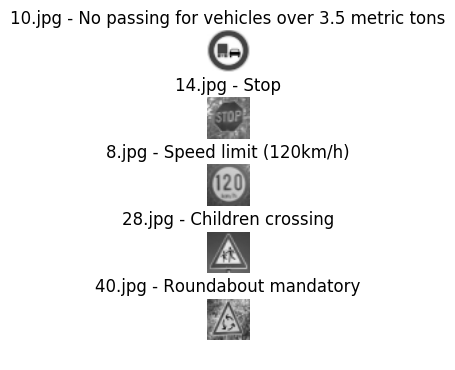

In [732]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Read all images from "test_images" folder
### The name of the file corresponds to the correct class of the image


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv


def newArrShape(A,amount=1):
    
    return np.concatenate([[amount],np.shape(A)[1:3],[1]],axis=0)

imlist=os.listdir("test_images/")

n_test_new = np.shape(imlist)[0];

y_test_new = np.zeros(n_test_new)
X_test_new =  np.zeros(newArrShape(X_test_gray,np.shape(imlist)[0]))
    

labels=[]

#Get Labels from csv file
with open('signnames.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        labels.append(row[1])
labels = labels[1:end]

indx=0

print("Custom images used for testing")

for imfile in imlist:
    i=imfile.find('.jpg')
    end_s=imfile.find('.')
    y_test_new[indx] = int(imfile[0:end_s])
    image = mpimg.imread('test_images/'+imfile)
    gray = np.mean(image,axis=2) 
    X_test_new[indx,:,:,:] = (np.reshape(gray,[1,32,32,1]))
    
    plt.subplot(5,1,indx+1)
    plt.axis("off")
    plt.imshow(gray,cmap='gray',vmin=0,vmax=255)
    plt.title(imfile+' - '+labels[int(y_test_new[indx])])
    plt.subplots_adjust(hspace=.6)
    indx=indx+1
    
plt.show()

print()
print()
    

In [ ]:
## Test on the new images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(logits,feed_dict={x:X_test_new})
    probs=sess.run(tf.nn.softmax(predictions))
    top_k_v,top_k_i=sess.run(tf.nn.top_k(probs,k=5))
    test_accuracy = evaluate(X_test_new, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


In [608]:
top_1_cor=0
top_5_cor=0
for i in range(5):
    if(top_k_i[i,0] == y_test_new[i]):
        top_1_cor=top_1_cor+1
        top_5_cor=top_5_cor+1
    else:
        if(np.sum(top_k_i[i] == y_test_new[i]) > 0):
            top_5_cor=top_5_cor+1
    
print("Top 1 Error: ",(1-(top_1_err/5))*100,"%")
print("Top 5 Error: ",(1-(top_5_err/5))*100,"%")

Top 1 Error:  40.0 %
Top 5 Error:  40.0 %


True Label:  No passing for vehicles over 3.5 metric tons  | Class ID:  10 
 Predicetd Label: No passing for vehicles over 3.5 metric tons  Predicted class id: 10  |  probability:  1.0



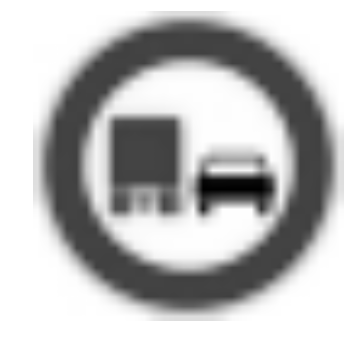

True Label:  Stop  | Class ID:  14 
 Predicetd Label: Stop  Predicted class id: 14  |  probability:  1.0



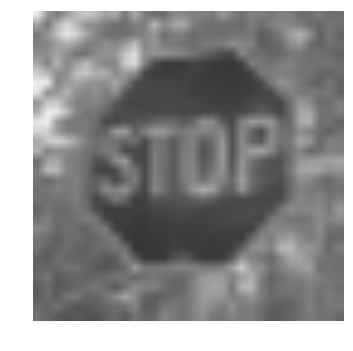

True Label:  Speed limit (120km/h)  | Class ID:  8 
 Predicetd Label: Speed limit (60km/h)  Predicted class id: 3  |  probability:  0.992865085602



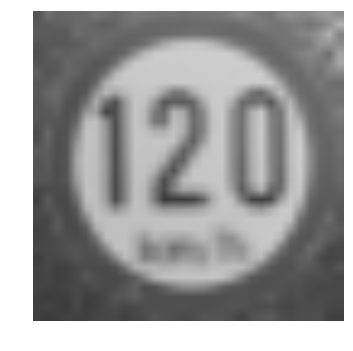

True Label:  Children crossing  | Class ID:  28 
 Predicetd Label: Children crossing  Predicted class id: 28  |  probability:  1.0



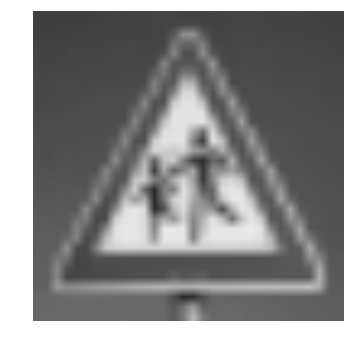

True Label:  Roundabout mandatory  | Class ID:  40 
 Predicetd Label: Dangerous curve to the left  Predicted class id: 19  |  probability:  0.863518595695



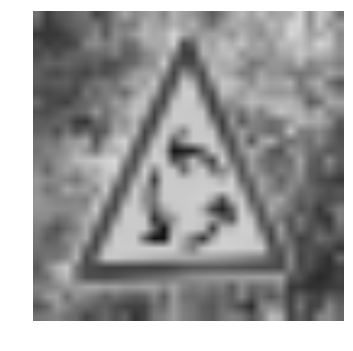

In [654]:
pred = np.zeros((n_test_new,2))

with tf.Session() as sess:
    for i in range(n_test_new):
        
        pred[i][0] = np.argmax(probs[i])
        pred[i][1] = np.max(probs[i])
        
        print("True Label: ",labels[int(y_test_new[i])]," | Class ID: ",int(y_test_new[i]),'\n',"Predicetd Label:", labels[int(pred[i][0])], " Predicted class id:", int(pred[i][0])," |  probability: ",pred[i][1])
        imshow(X_test_new[i].squeeze(),col='g')



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images where chosen randomly from the web. They where rescaled to 32x32. The size and orientation where selected randomly. The first image is a drawn sign and not from a real scene, however, the features are clearly shown so it is expected that a well trained network will still be able to predict its class correclty. The third image even though at first glance appears similar to the ones in the database, has a different scale. The final image is not even in the database and so it is interesting to see what the network predicts. The other two images appear similar to the ones in the database. 


In [334]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model has an accuracy of 60% on the 5 images. As such it is able to predict the correct class for three images. The  accuracy on the new images is quite low from that of the validation (94%) and even test (93%) sets. Some possible reasons for this are highlighted below. 

Top 5 Classes

[10  5  9 42  3]

Corresponding Probability Values

[  1.00000000e+00   3.13012349e-09   1.13521666e-11   5.76926609e-14
   4.12933373e-14]



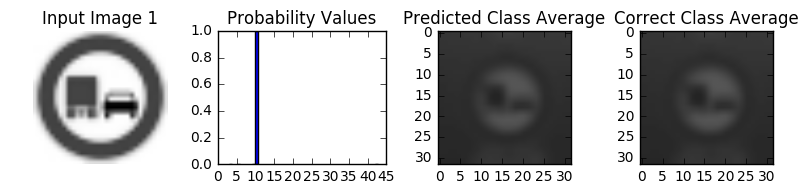

Top 5 Classes

[14 18 39  1  3]

Corresponding Probability Values

[  1.00000000e+00   5.45330658e-19   1.50760068e-21   3.84197147e-22
   2.91690319e-22]



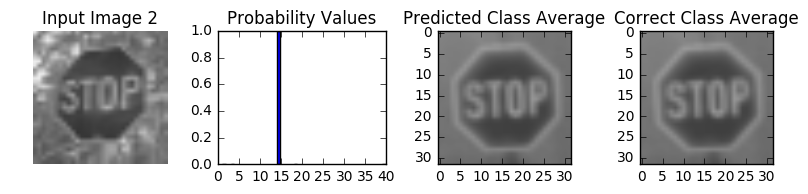

Top 5 Classes

[ 3 31 29  5 18]

Corresponding Probability Values

[  9.92865086e-01   5.09938458e-03   1.91438606e-03   1.18360556e-04
   2.17118850e-06]



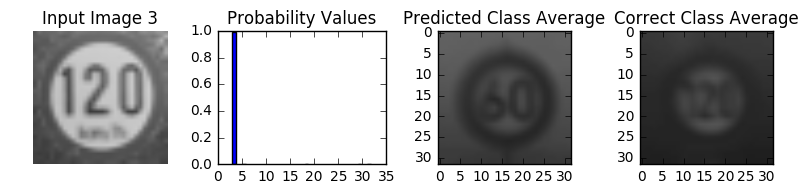

Top 5 Classes

[28 24 18 11  3]

Corresponding Probability Values

[  1.00000000e+00   2.62713614e-12   1.26320802e-14   4.05520001e-18
   3.11249143e-19]



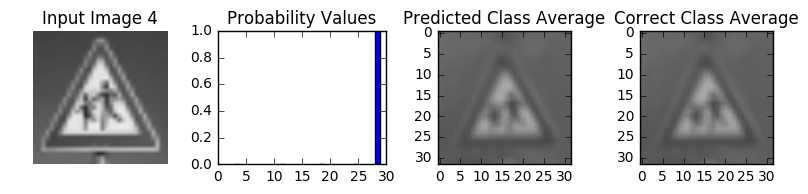

Top 5 Classes

[19 12 11 26 30]

Corresponding Probability Values

[ 0.8635186   0.08508094  0.03688313  0.00708946  0.00338845]



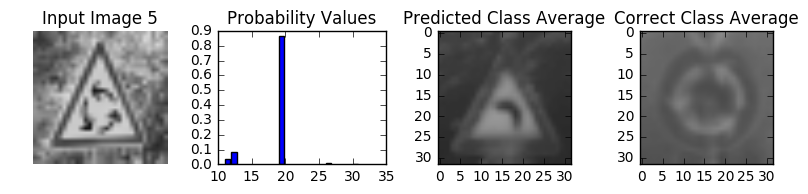

In [726]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
indx=1
with tf.Session() as sess:
    for i in range(n_test_new):
        
        pred[i][0] = np.argmax(probs[i])
        pred[i][1] = np.max(probs[i])
        
        #print(probs[i])
        #print(predictions[i])    
        print('Top 5 Classes')
        print()
        print(top_k_i[i])
        print()
        print('Corresponding Probability Values')
        print()
        print(top_k_v[i])
        print()
        
        label = np.max(pred[i])
        
        plt.figure(figsize=(10,10))  
        plt.subplot(5,4,indx)
        plt.title("Input Image "+str(i+1))
        plt.axis("off")
        plt.imshow(X_test_new[i].squeeze(),cmap='gray',vmin=0,vmax=255)
        indx=indx+1
        
        plt.subplot(5,4,indx)
        plt.title("Probability Values")
        plt.axis("on")
        plt.bar(top_k_i[i],top_k_v[i])
        indx=indx+1
        
        plt.subplot(5,4,indx)
        plt.title("Predicted Class Average")
        plt.imshow(repr_class_im[int(pred[i][0])],cmap='gray',vmin=0,vmax=255)
        indx=indx+1
        
        plt.subplot(5,4,indx)
        plt.title("Correct Class Average")
        plt.imshow(repr_class_im[int(y_test_new[i])],cmap='gray',vmin=0,vmax=255)
        indx=indx+1
        
        plt.show()
        #plt.subplots_adjust(hspace=.2)
     


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model achieves a top 1 error of 40%. The top 5 error is also 40% as when a wrong prediction is made the correct class is not within the top 5 options. 

Furthermore, the model appears to be quite confident in all the predictions, even though some are wrong. However, uppon close inspecttion you can see why it was fooled for images 3 and 5. Image 3 has a different size to what the speed signs in the database have. The sign outline reaches the border of the image whereas in the training images there contain sufficient background. For image 5, the roundabout signs in the database are circle shaped whereas this is a triangle. The network is influenced greatly by the shape. Furthemore, the arrows within the image also much the left turn and that is why it is selected. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.